# Simple Linear Regression: Confidence- and Prediction-Intervals

This notebook demonstrates how to create confidence and prediction intervals for a linear regression model using Python, based on rental price data (Y) and living area (X).

See also: https://lmc2179.github.io/posts/confidence_prediction.html

## Libraries and Settings

In [5]:
# Import libraries
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

/workspaces/python_machine_learning_basics/Linear_Regression


## Generate Apartment Data
We will use the provided data representing rental prices (`Y`) and living area (`X`).

In [8]:
# Define columns for import
columns = [ 'Student_ID','IQ','Grade','Age','Parents_Income','Efficiency'
           ]

# Read and select variables
df_orig = pd.read_csv("./Data/Updated_Student_Dataset_with_Efficiency.csv", 
                      sep=",", 
                      encoding='utf-8')[columns]

# Rename variable 'web-scraper-order' to 'apmt_id'
df_orig = df_orig.rename(columns={'Student_ID': 'id'})

# Remove missing values
df = df_orig.dropna()
df.head(5)

# Remove duplicates
df = df.drop_duplicates()

sub_df = df[['IQ','Efficiency']]

print(sub_df.shape)
sub_df.head(5)

(500, 2)


,IQ,Efficiency
0,107.0,80.0
1,98.0,82.0
2,110.0,70.0
3,123.0,85.0
4,96.0,68.0


## Fit an OLS Regression Model
We will use `statsmodels` to fit an ordinary least squares (OLS) regression model for rental price as a function of living area.

                            OLS Regression Results                            
Dep. Variable:                     IQ   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     640.2
Date:                Sun, 10 Nov 2024   Prob (F-statistic):           1.95e-91
Time:                        13:43:01   Log-Likelihood:                -1846.9
No. Observations:                 500   AIC:                             3698.
Df Residuals:                     498   BIC:                             3706.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.2961      4.345     -2.140      0.0

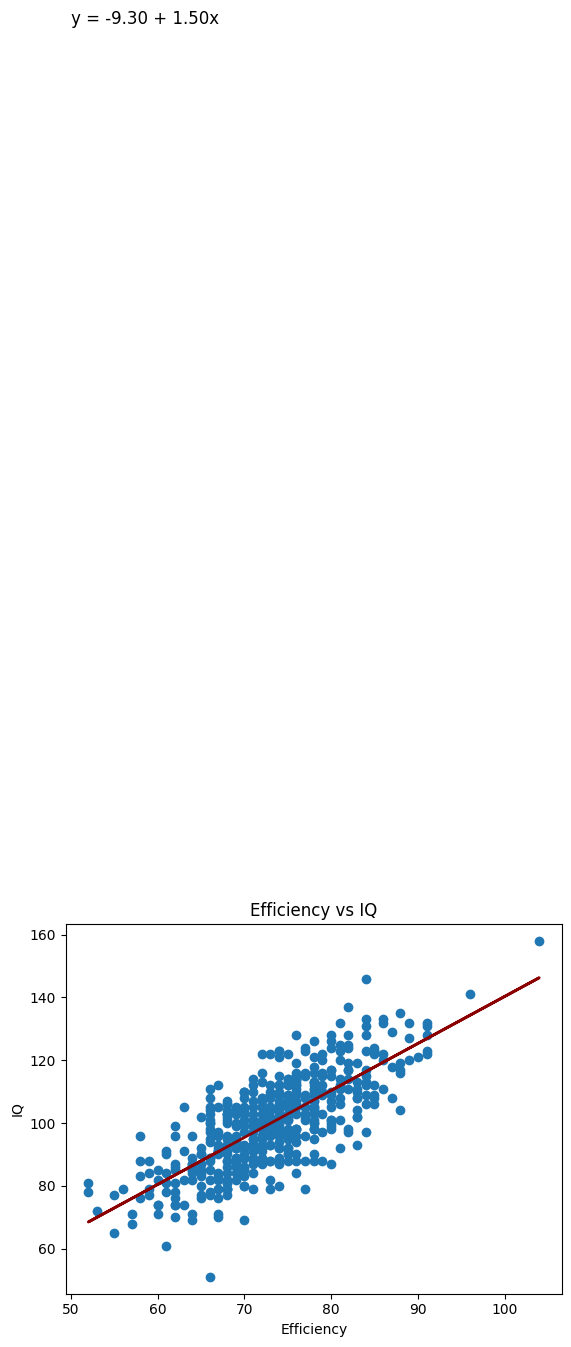

In [ ]:
# Fit OLS regression
model = smf.ols('IQ ~ Efficiency', data=df)

# Get and show results
results = model.fit()
print(results.summary())

# Plot data and regression line
plt.scatter(df['Efficiency'], df['IQ'])
plt.plot(df['Efficiency'], 
         results.predict(df['Efficiency']), 
         color='darkred', 
         linewidth=2)
plt.xlabel('Efficiency')
plt.ylabel('IQ')
plt.title('Efficiency vs IQ')

# Add annotation (regression equation with f-string)
plt.text(50, 4500, f"y = {results.params[0]:.2f} + {results.params[1]:.2f}x", 
         fontsize=12, color='black')

plt.show()


## Generate Prediction- and Confidence Intervals

We calculate the prediction- and confidence intervals for the model.

In [13]:
# Generate predictions and confidence intervals
alpha = 0.05
predictions = results.get_prediction(df).summary_frame(alpha)
predictions.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,110.376847,0.596395,109.205086,111.548608,91.193895,129.559799
1,113.368670,0.682603,112.027533,114.709807,94.174628,132.562712
2,95.417731,0.473117,94.488179,96.347284,76.248050,114.587413
3,117.856405,0.826903,116.231757,119.481053,98.640472,137.072338
4,92.425908,0.530434,91.383743,93.468074,73.250437,111.601380


## Visualizing the Regression Line and Confidence Interval

We now plot the observed data along with the regression line and confidence intervals.

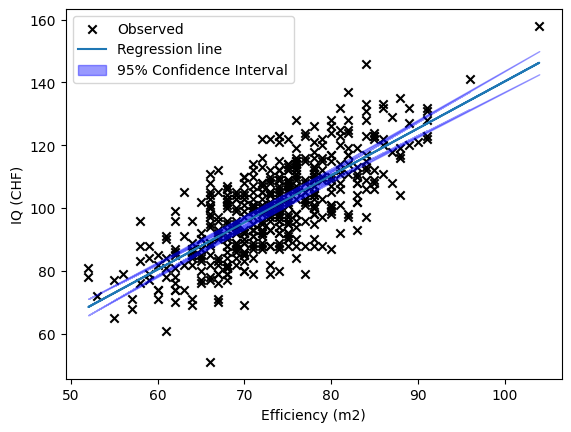

In [14]:
# Plot observed data and regression line
plt.scatter(df['Efficiency'], 
            df['IQ'], 
            label='Observed', 
            marker='x', 
            color='black')

# Plot regression line
plt.plot(df['Efficiency'], 
         predictions['mean'], 
         label='Regression line')

# Plot confidence intervals
plt.fill_between(df['Efficiency'], 
                 predictions['mean_ci_lower'], 
                 predictions['mean_ci_upper'], 
                 color='blue', 
                 alpha=0.4, 
                 label='95% Confidence Interval')

# Add legend and labels
plt.xlabel('Efficiency (m2)')
plt.ylabel('IQ (CHF)')
plt.legend()
plt.show()

## Visualizing the Regression Line and Prediction Interval

We now plot the observed data along with the regression line, confidence- and prediction intervals.

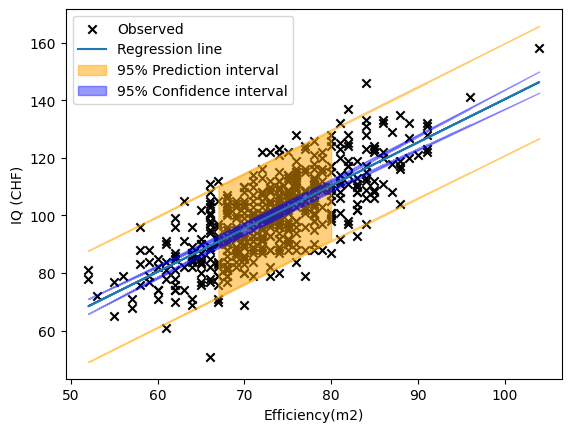

In [15]:
# Plot observed data and regression line
plt.scatter(df['Efficiency'], 
            df['IQ'], 
            label='Observed', 
            marker='x', 
            color='black')

# Plot regression line
plt.plot(df['Efficiency'], 
         predictions['mean'], 
         label='Regression line')

# Plot prediction interval
plt.fill_between(df['Efficiency'], 
                 predictions['obs_ci_lower'], 
                 predictions['obs_ci_upper'], 
                 alpha=.5, 
                 label='95% Prediction interval',
                 color='orange')

# Plot confidence interval
plt.fill_between(df['Efficiency'], 
                 predictions['mean_ci_lower'], 
                 predictions['mean_ci_upper'], 
                 alpha=.4, 
                 label='95% Confidence interval',
                 color='blue')

# Add labels
plt.xlabel('Efficiency(m2)')
plt.ylabel('IQ (CHF)')
plt.legend()

# Show plot
plt.show()

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [7]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.5.0-1025-azure
Datetime: 2024-11-10 13:32:18
Python Version: 3.11.10
-----------------------------------
